# Paratopes in Absolut

We explore the paratope data in Absolut.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from NegativeClassOptimization import utils, config, preprocessing, visualisations

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Dataset 4 data organization

Looks like `Task4_Merged_Slice_ParaEpi.zip` could be the only file with everything we would currently need.

In [2]:
df = pd.read_csv("../data/Absolut/processed/paratope_epitope/Task4_Merged_Slice_ParaEpi.txt", sep="\t")
df.head(2)

,Slide,Label,hotspot_ID,seqAGEpitope,motifAGEpitope,agregatesAGEpitope,chemicalAGEpitope,seqABParatope,motifABParatope,agregatesABParatope,chemicalABParatope,AAcompoFullSlice,sizeCDR3
0,LLGLYWYFDVW,1ADQ_A,1ADQ_A_H1,S1W1V1D1V2Q1V3N1A1K1T2V1L2H1N1Y1,X1--X1--X1X1--X2X1X3--X1X1X1--X2X1X2X1--X1--X1,S1--W1--V1D1--V2Q1V3--N1A1K1--T2V1L2H1--N1--Y1,p1--r1--n1c1--n2p1n3--p1n1c1--p2n1n2c1--p1--r1,L3L4G3L1Y2Y2F2V2W2*,X3X4X3X1X2--X2X2--X2X2*,L3L4G3L1Y2--Y2F2--V2W2*,n3n4n3n1r2--r2r2--n2r2*,0_0_0.0909091_0_0.0909091_0.0909091_0_0_0_0.27...,15
1,YYSNYWYFDVW,1ADQ_A,1ADQ_A_H2,P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1,X1--X1X1--X3--X3X1X1X2--X1X1--X1X1X1--X1--X1X2...,P1--V1F1--V3--D3V1S1Q2--Q1V1--T1K1P1--E1--Y1R2...,n1--n1r1--n3--c3n1p1p2--p1n1--p1c1n1--c1--r1c2...,Y2Y3N2Y1W3Y1F4D1V4W3*,X2X3--X2X1X3X1X4X1X4X3*,Y2Y3--N2Y1W3Y1F4D1V4W3*,r2r3--p2r1r3r1r4c1n4r3*,0_0_0.0909091_0_0.0909091_0_0_0_0_0_0_0.090909...,14


In [3]:
print("Hotspots per label:")
df.groupby("Label")["hotspot_ID"].apply(lambda x: len(x.unique()))

Hotspots per label:


Label
1ADQ_A    4
1FBI_X    2
1FNS_A    1
1FSK_A    5
1H0D_C    3
         ..
5MES_A    1
5T5F_A    3
5TH9_A    1
5TLJ_X    2
5TZ2_C    1
Name: hotspot_ID, Length: 159, dtype: int64

In [4]:
print("Epitopes per label:")
df.groupby("hotspot_ID")["seqAGEpitope"].apply(lambda x: len(x.unique()))

Epitopes per label:


hotspot_ID
1ADQ_A_H1              23
1ADQ_A_H2              12
1ADQ_A_H3               3
1ADQ_A_H4               2
1FBI_X_H1               6
                     ... 
5T5F_A_H15T5F_A_H2      7
5T5F_A_H2               1
5TH9_A_H1               5
5TLJ_X_H1              13
Unknown               520
Name: seqAGEpitope, Length: 263, dtype: int64

In [5]:
print("Paratopes per epitope:")
df.groupby(["hotspot_ID", "seqAGEpitope"])["seqABParatope"].apply(lambda x: len(x.unique()))

Paratopes per epitope:


hotspot_ID  seqAGEpitope                            
1ADQ_A_H1   D1I1S1T1W1V1D1V1Q1V1A1K1T2V1L2H1Q1N1Y1          1
            D1I1S1T1W1V1D1V2Q1V2A1K1T2V1L2N1Y1              7
            K1D1I1S1T1W1V1D1V1Q1V1A1K1V1T3V1L2N1Y1        468
            K1D1I1S1T1W1V1D1V2Q1V2A1K1T2V1L2N1Y1E1         62
            K1D1I2S1T1W1V1D1V1Q1V1A1K1T2V1L2N1Y1E1H1       14
                                                        ...  
Unknown     Y1S1L1K1F2L1G1I2I1F1I1T1L2N1L1L1                3
            Y1S1L1K1F2L1G1I2I1F1I1T1L2N1S1L1E1L1           36
            Y1S1L1K1F2L1G1I2I1F1I1T2L2N1S1L1E1L1          592
            Y1S1L1K1F2L1G1I3I1F1I1L2K1Y1N2L1L1          10749
            Y1S2L1K1F2L1G1I3F1I1F1I1L1K1Y2                  1
Name: seqABParatope, Length: 3150, dtype: int64

In [6]:
# print("Paratopes per epitope (unique):")
# df.groupby(["hotspot_ID", "seqAGEpitope"])["seqABParatope"].apply(lambda x: len(x.unique())).sum()

In [7]:
# No duplicated slides per antigen
df.groupby(["Label"])["Slide"].apply(lambda x: x.duplicated(keep=False).sum())

Label
1ADQ_A    0
1FBI_X    0
1FNS_A    0
1FSK_A    0
1H0D_C    0
         ..
5MES_A    0
5T5F_A    0
5TH9_A    0
5TLJ_X    0
5TZ2_C    0
Name: Slide, Length: 159, dtype: int64

## Add paratope data to slide sequences

Previously we haven't been using paratope data. Now we fetch this data from Dataset4 and append it. We also provide here an exploratory analysis of paratopes in mini-Absolut. 

In [8]:
df = utils.load_1v1_binary_dataset(
    ag_pos="1ADQ",
    ag_neg="3VRL",
    num_samples=20000,
    with_paratopes=True,
)

print(df.shape)
print(df.columns)
df.head(2)

(20000, 13)
Index(['ID_slide_Variant', 'CDR3', 'Best', 'Slide', 'Energy', 'Structure',
       'UID', 'Antigen', 'Slide_farmhash_mod_10', 'Label', 'hotspot_ID',
       'agregatesAGEpitope', 'agregatesABParatope'],
      dtype='object')


,ID_slide_Variant,CDR3,Best,Slide,Energy,Structure,UID,Antigen,Slide_farmhash_mod_10,Label,hotspot_ID,agregatesAGEpitope,agregatesABParatope
35211,6981712_03a,CARTLLFPHWYFDVW,True,TLLFPHWYFDV,-99.34,128868-LSRRLLSUSU,1ADQ_6981712_03a,1ADQ,0,1ADQ_A,1ADQ_A_H1,L1--R1--P1--W1--V1D2--V1Q1V1--A1K1--T1V1L1H1Q3...,T2L3L4F3P1H1W1Y1F2D1V4*
27343,4817889_07a,CAREWGAPLLWLRWAMDYW,True,PLLWLRWAMDY,-95.26,128868-LSRRLLSUSU,1ADQ_4817889_07a,1ADQ,8,1ADQ_A,1ADQ_A_H1,L1--R1--P1--W1--V1D2--V1Q1V1--A1K1--T1V1L1H1Q3...,P2L3L4W3L1R1W1A1M2D1Y4*


In [9]:
# Drop NA
df = df.loc[~df["agregatesABParatope"].isna()].copy()

## Paratope representations
Need a good, convenient way to represent paratope, such that later we can easily derive a matrix and compare with xAI results.

In [10]:
# Slide	seqABParatope   motifABParatope
s = df.loc[df["agregatesABParatope"].str.contains("-")].iloc[0]
s["Slide"], s["agregatesABParatope"]

('AINLDWYFDVW', 'A2I3--L2D1W3Y1F4D1V4W3*')

In [11]:
simple_paratope = preprocessing.get_no_degree_paratope(s["agregatesABParatope"])
print(simple_paratope)
enc = preprocessing.onehot_encode_nodeg_paratope(simple_paratope)
enc.reshape(-1, 20)

AI-LDWYFDVW


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [12]:
df["simpleABParatope"] = df["agregatesABParatope"].apply(preprocessing.get_no_degree_paratope)
df["simpleMotifABParatope"] = df["simpleABParatope"].apply(lambda x: "".join("X" if c in config.AMINOACID_ALPHABET else c for c in x))

# Drop simple_paratopes of len < 11
df = df.loc[df["simpleABParatope"].str.len() == 11].copy()
df.reset_index(drop=True, inplace=True)
print(df.shape)

(18858, 15)


In [13]:
deg_paratope = s["agregatesABParatope"]
print(deg_paratope)
enc = preprocessing.onehot_encode_deg_paratope(deg_paratope)
enc.reshape(-1, 20)

A2I3--L2D1W3Y1F4D1V4W3*


array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 4., 0., 0.],
       [0., 0., 0., 0., 0., 0.

## Further EDA paratopes in Absolut

There are many paratopes.

<AxesSubplot: title={'center': 'Distribution of #simpleABParatope'}, ylabel='Frequency'>

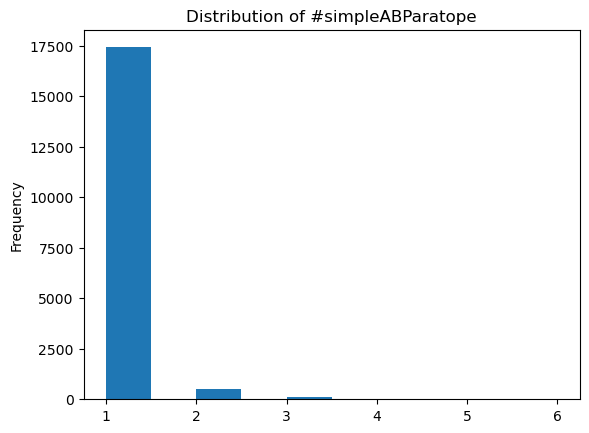

In [14]:
df.groupby(["Antigen"])["simpleABParatope"].value_counts().sort_values(ascending=False).plot.hist(title="Distribution of #simpleABParatope")

Rich motifs (i.e. motifs with many "X") are can be highly frequent.

Antigen  simpleMotifABParatope
3VRL     XX-XXXXXXXX              6973
         XXXXXXXX-XX              2397
1ADQ     XXXXXXXXXXX              2147
         XX-XXXXXXXX              1779
         XXXXX-XX-XX              1164
         XXXXXXXX-XX              1011
         XX-XXXXXX-X               846
         X-XXXXXX-XX               649
         X-XXXXXXXXX               538
3VRL     XXXXXXX-XXX               279
         XXX-XXXXXXX               265
1ADQ     XXXXXXXXX-X               241
         X-X-XXXXXXX               125
         XXXXX-XXXXX               123
         XXXXXXX-XXX               105
         XX-XX-XXXXX                70
         X-XXXX-XXXX                41
         XXX-XXXXXXX                40
         XXXX-XXXX-X                29
         XXXXXX-XXXX                11
         XXXXXX-XX-X                 9
         XXXX-XXXXXX                 4
3VRL     XXXXXXXXXXX                 4
         XXXXXX-XX-X                 3
1ADQ     X-XX-XXXXXX             

<AxesSubplot: title={'center': 'Distribution of #simpleABParatope'}, ylabel='Frequency'>

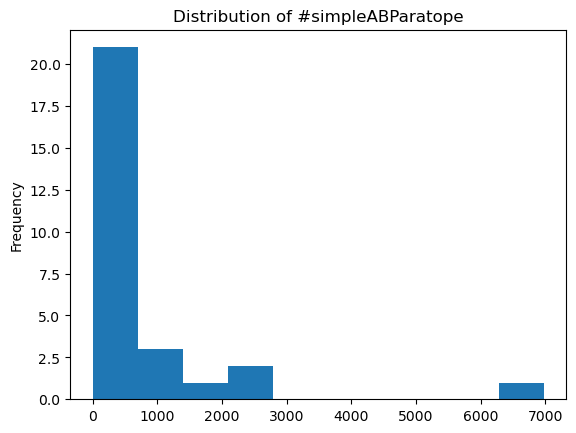

In [15]:
print(df.groupby(["Antigen"])["simpleMotifABParatope"].value_counts().sort_values(ascending=False))
df.groupby(["Antigen"])["simpleMotifABParatope"].value_counts().sort_values(ascending=False).plot.hist(title="Distribution of #simpleABParatope")

Paratope logos.

In [16]:
# Compute position-weight matrix
from typing import List

def compute_pwm(simple_paratopes: List[str]):
    """Compute position-weight matrix from list of simple paratopes."""
    pwm = (np.concatenate(
        list(map(preprocessing.onehot_encode_nodeg_paratope, simple_paratopes)),
        axis=0,
        ).sum(axis=0) / df.shape[0]
    ).reshape(-1, 20)
    
    return pwm

# pwm = compute_pwm(df["simpleABParatope"].to_list())
pwm_ag_pos = compute_pwm(df.loc[df["Antigen"] == "1ADQ", "simpleABParatope"].to_list())
pwm_ag_neg = compute_pwm(df.loc[df["Antigen"] == "3VRL", "simpleABParatope"].to_list())

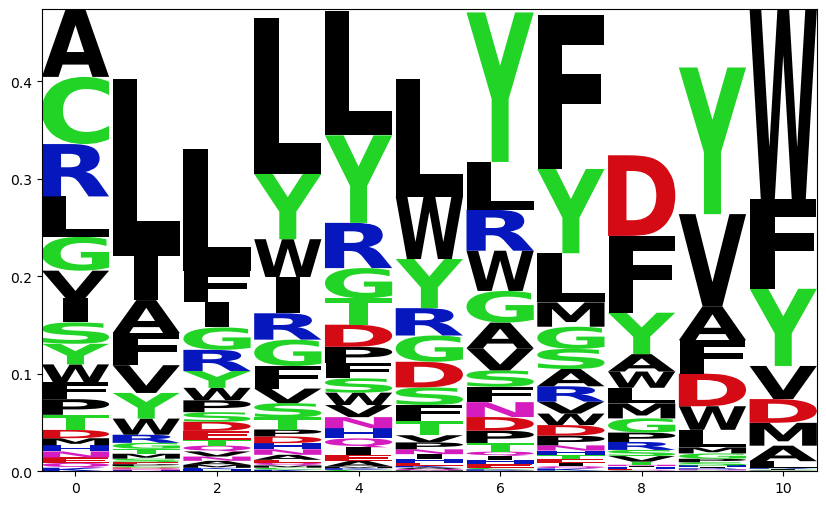

In [17]:
visualisations.plot_logo(
    pd.DataFrame(pwm_ag_pos.reshape(-1, 20), columns=config.AMINOACID_ALPHABET),
)

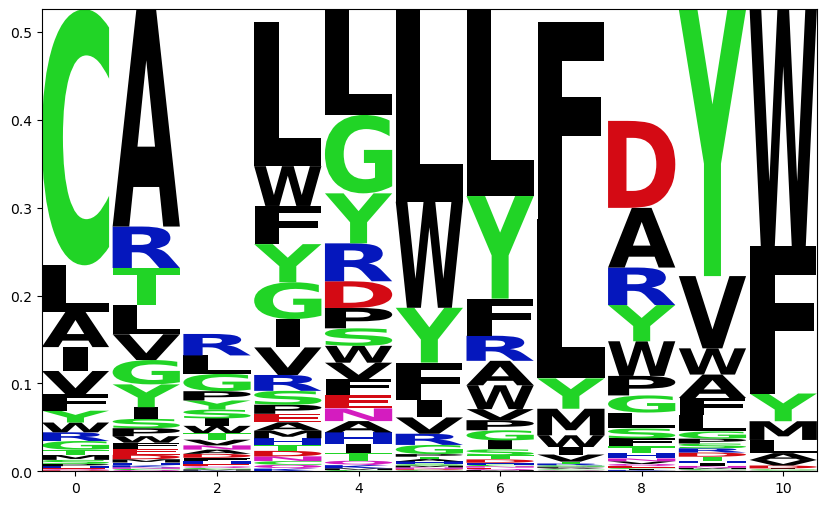

In [18]:
visualisations.plot_logo(
    pd.DataFrame(pwm_ag_neg.reshape(-1, 20), columns=config.AMINOACID_ALPHABET),
)

A2I3--L2D1W3Y1F4D1V4W3*


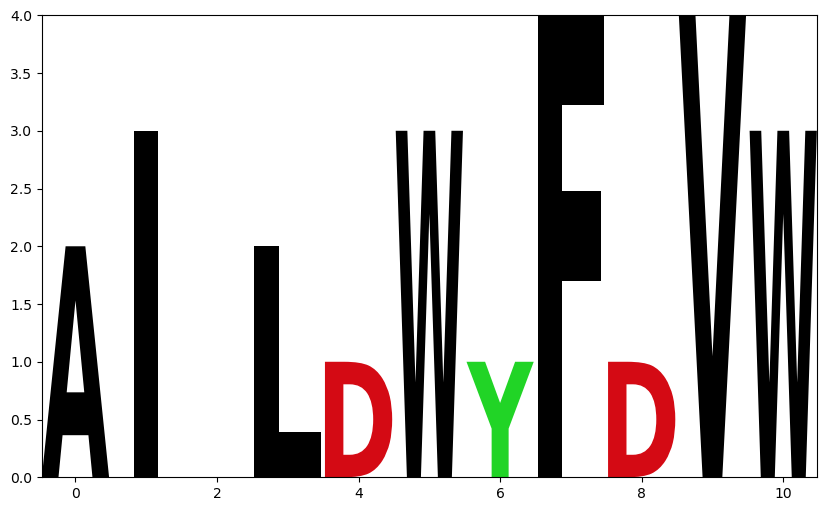

In [19]:
# Plot one paratope with degrees
deg_paratope = s["agregatesABParatope"]
print(deg_paratope)
enc = preprocessing.onehot_encode_deg_paratope(deg_paratope)
visualisations.plot_logo(
    pd.DataFrame(enc.reshape(-1, 20), columns=config.AMINOACID_ALPHABET),
)